# YOLOv8n Vessel Detection Model Evaluation

Evaluates the 3 models trained on the generated datasets single-pol-2ch (baseline), single-pol-3ch and dula-pol-3ch.

## 1. Setup

In [33]:
# Better error messages in notebooks
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Set up data paths
from pathlib import Path
import sys

# Get to project root from notebook location
PROJECT_ROOT = Path.cwd().parent
# Add "src" to Python's module search path sys.path
sys.path.append(str(PROJECT_ROOT / "src"))
sys.path.append("/home/peterm/UWA/CITS5014/SARFish/working")

# Define project paths
DATA_DIR = PROJECT_ROOT / "data"
CONFIG_DIR = PROJECT_ROOT / "configs"
RUNS_DIR = PROJECT_ROOT / "runs"

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"DATA_DIR:     {DATA_DIR}")
print(f"CONFIG_DIR:   {CONFIG_DIR}")
print(f"RUNS_DIR:     {RUNS_DIR}")

PROJECT_ROOT: /home/peterm/UWA/CITS5014/SARFish/modelling
DATA_DIR:     /home/peterm/UWA/CITS5014/SARFish/modelling/data
CONFIG_DIR:   /home/peterm/UWA/CITS5014/SARFish/modelling/configs
RUNS_DIR:     /home/peterm/UWA/CITS5014/SARFish/modelling/runs


In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import yaml
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
from ultralytics import YOLO
from utilities import *
from plot_loss_curves import plot_total_loss
from du_utilities import *
from iou_analysis import *

## 2. Vessel detection evaluation on models trained on the three generated datasets, on test data

### 2.1 **single-pol-2ch**

In [4]:
# single-pol-2ch = '/mnt/h/SARFish/Generated/SLC/test/crops_png_alt/images'  (20250910_2352_701491)

In [10]:
# Define the path to the run best model for retrieval
results_path = RUNS_DIR / 'png_runs' / 'png_aug_bal' / '20250910_2352_701491'
eval_path = Path(results_path / 'evaluation' / 'test')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250910_2352_701491/evaluation/test


In [11]:
# Define the path to the best model
model_path=results_path / 'weights' / 'best.pt'
print(model_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250910_2352_701491/weights/best.pt


In [7]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/mnt/h/SARFish/Generated/SLC/',
    'train':  'train/crops_png_aug/images_hvrt_msc_bal_new',
    'val':    'val/crops_png_alt/images',
    'test':   'test/crops_png_alt/images',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_alt.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

In [8]:
# Load the model
model = YOLO(model_path)

In [9]:
# Run validation with Ultralytics defaults
test_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='test',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 8.9±0.8 ms, read: 1.8±0.6 MB/s, size: 20.5 KB)


val: Scanning /mnt/h/SARFish/Generated/SLC/test/crops_png_alt/labels.cache... 253 images, 0 backgrounds, 0 corrupt: 100%|████
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00

                   all        253        253      0.568      0.486      0.536      0.261
             is_vessel        221        221      0.802      0.629      0.793      0.402
            is_fishing         32         32      0.334      0.344      0.278       0.12
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 2.1ms postprocess per image


In [10]:
test_labels_path = '/mnt/h/SARFish/Generated/SLC/test/crops_png_alt/labels'
print(test_labels_path)

/mnt/h/SARFish/Generated/SLC/test/crops_png_alt/labels


In [11]:
  # Run the iou analysis (returns a pandas DataFrame)
  single_pol_2ch_df = run_iou_analysis(
      gt_dir=test_labels_path,
      pred_dir=str(eval_path / 'val' / 'labels'),
      iou_start=0.3,
      iou_end=1.0,
      iou_step=0.05,
      output_csv=None,
      verbose=False
  )

In [12]:
# Save to pickle
single_pol_2ch_df.to_pickle(str(eval_path / 'single_pol_2ch_df.pkl'))

In [13]:
# Plot the results
#plot_iou_analysis(single_pol_2ch_df, save_path=None, title_suffix=" [Run: 20250910_2352_701491]")

### 2.2 **single-pol-3ch**

In [14]:
# single-pol-3ch = '/mnt/h/SARFish/Generated/SLC/test/crops_png_ext/images'  (20250924_1934_33064)

In [13]:
# Define the path to the run best model for retrieval
results_path = RUNS_DIR / 'png_runs' / 'png_aug_bal' / '20250924_1934_33064'
eval_path = Path(results_path / 'evaluation' / 'test')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250924_1934_33064/evaluation/test


In [14]:
# Define the path to the best model
model_path=results_path / 'weights' / 'best.pt'
print(model_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250924_1934_33064/weights/best.pt


In [17]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/mnt/h/SARFish/Generated/SLC/',
    'train':  'train/crops_png_aug/images_hvrt_msc_bal_new_ext',
    'val':    'val/crops_png_ext/images',
    'test':   'test/crops_png_ext/images',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_ext.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

In [18]:
# Load the model
model = YOLO(model_path)

In [19]:
# Run validation with Ultralytics defaults
test_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='test',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 3.9±0.6 ms, read: 4.7±0.1 MB/s, size: 26.6 KB)


val: Scanning /mnt/h/SARFish/Generated/SLC/test/crops_png_ext/labels.cache... 253 images, 0 backgrounds, 0 corrupt: 100%|████
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00

                   all        253        253      0.567       0.56      0.547      0.267
             is_vessel        221        221      0.838      0.652      0.799      0.407
            is_fishing         32         32      0.297      0.469      0.294      0.128
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 1.6ms postprocess per image


In [20]:
test_labels_path = '/mnt/h/SARFish/Generated/SLC/test/crops_png_ext/labels'
print(test_labels_path)

/mnt/h/SARFish/Generated/SLC/test/crops_png_ext/labels


In [21]:
  # Run the iou analysis (returns a pandas DataFrame)
  single_pol_3ch_df = run_iou_analysis(
      gt_dir=test_labels_path,
      pred_dir=str(eval_path / 'val' / 'labels'),
      iou_start=0.3,
      iou_end=1.0,
      iou_step=0.05,
      output_csv=None,
      verbose=False
  )

In [22]:
# Save to pickle
single_pol_3ch_df.to_pickle(str(eval_path / 'single_pol_3ch_df.pkl'))

In [23]:
# Plot the results
#plot_iou_analysis(single_pol_3ch_df, save_path=None, title_suffix=" [Run: 20250924_1934_33064]")

### 2.3 **dual-pol-3ch**

In [24]:
# dual-pol-3ch = '/mnt/h/SARFish/Generated/SLC/test/crops_png_dual/images'  (20250915_1358_30042)

In [7]:
# Define the path to the run best model for retrieval
results_path = RUNS_DIR / 'png_runs' / 'png_aug_dual' / '20250915_1358_30042'
eval_path = Path(results_path / 'evaluation' / 'test')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_dual/20250915_1358_30042/evaluation/test


In [26]:
# Define the path to the best model
model_path=results_path / 'weights' / 'best.pt'
print(model_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_dual/20250915_1358_30042/weights/best.pt


In [27]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/mnt/h/SARFish/Generated/SLC/',
    'train':  'train/crops_png_dual_aug/images_hvrt_msc_bal',
    'val':    'val/crops_png_dual/images',
    'test':   'test/crops_png_dual/images',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_dual.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

In [28]:
# Load the model
model = YOLO(model_path)

In [29]:
# Run validation with Ultralytics defaults
test_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='test',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.4±1.0 ms, read: 8.2±2.9 MB/s, size: 25.8 KB)


val: Scanning /mnt/h/SARFish/Generated/SLC/test/crops_png_dual/labels.cache... 253 images, 0 backgrounds, 0 corrupt: 100%|███
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00

                   all        253        253      0.604      0.527       0.55      0.268
             is_vessel        221        221      0.818      0.647      0.777      0.406
            is_fishing         32         32       0.39      0.406      0.323      0.129
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 1.6ms postprocess per image


In [4]:
test_labels_path = '/mnt/h/SARFish/Generated/SLC/test/crops_png_dual/labels'
print(test_labels_path)

/mnt/h/SARFish/Generated/SLC/test/crops_png_dual/labels


In [31]:
  # Run the iou analysis (returns a pandas DataFrame)
  dual_pol_3ch_df = run_iou_analysis(
      gt_dir=test_labels_path,
      pred_dir=str(eval_path / 'val' / 'labels'),
      iou_start=0.3,
      iou_end=1.0,
      iou_step=0.05,
      output_csv=None,
      verbose=False 
  )

In [32]:
# Save to pickle
dual_pol_3ch_df.to_pickle(str(eval_path / 'dual_pol_3ch_df.pkl'))

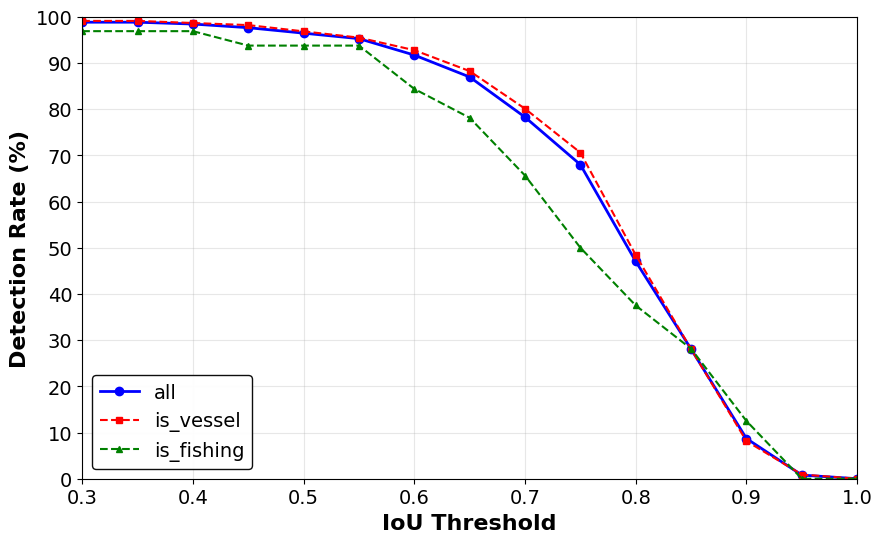

In [42]:
# Plot the results
#plot_iou_analysis(dual_pol_3ch_df, save_path=None, title_suffix=" [Run: 20250915_1358_30042]")

**Retrieve all dataframes to generate the combined plot**

In [5]:
# Build the eval paths
eval_path1 = Path('/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250910_2352_701491/evaluation/test')
eval_path2 = Path('/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250924_1934_33064/evaluation/test')
eval_path3 = Path('/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_dual/20250915_1358_30042/evaluation/test')

In [6]:
# load the dataframes
single_pol_2ch_df = pd.read_pickle(str(eval_path1 / 'single_pol_2ch_df.pkl'))
single_pol_3ch_df = pd.read_pickle(str(eval_path2 / 'single_pol_3ch_df.pkl'))
dual_pol_3ch_df   = pd.read_pickle(str(eval_path3 / 'dual_pol_3ch_df.pkl'))

In [7]:
# # Run analysis for 3 models
models_dict = {
    'single_pol_2ch': single_pol_2ch_df,
    'single_pol_3ch': single_pol_3ch_df,
    'dual_pol_3ch': dual_pol_3ch_df
}

In [25]:
class_names = {0: 'is_vessel', 1: 'is_fishing'}

In [26]:
# Plot for class 0 only
#plot_multimodel_comparison(models_dict, class_id=0, save_path=None, class_names=class_names)

In [27]:
# Plot for class 1 only
#plot_multimodel_comparison(models_dict, class_id=1, save_path=None, class_names=class_names)

In [28]:
# Plot all classes combined
#plot_multimodel_comparison(models_dict, class_id=None, save_path=None, class_names=class_names)

Combined plot saved to: vessel_detect_model_comparison.pdf


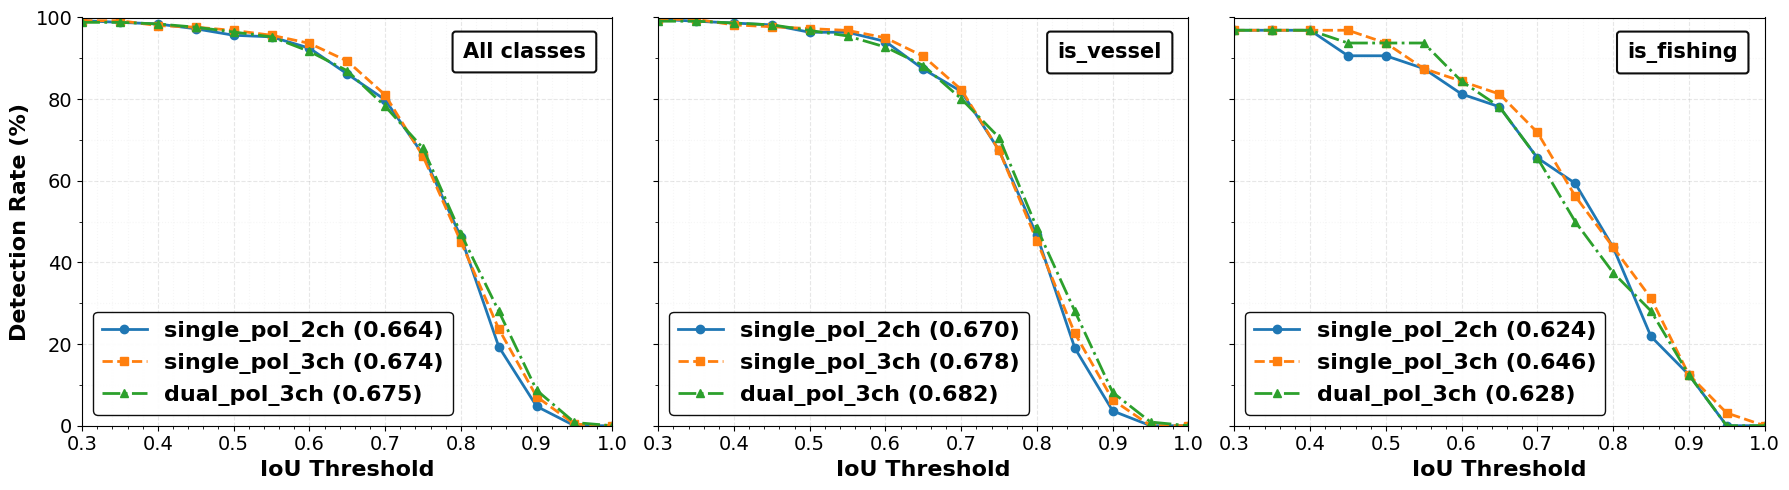

In [37]:
# Generate a combined plot (all, class 0, class 1)
plot_all_classes_multimodel_combined(
    models_dict,
    save_path='vessel_detect_model_comparison.pdf',
    show_plot=True
)

In [19]:
import numpy as np

def compute_auc_all(df, normalize=True):
    """
    Compute AUC for all rate columns (overall + per-class) in the given DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain:
          - 'iou_threshold'
          - any number of rate columns (e.g., 'overall_rate', 'class_0_rate', 'class_1_rate', ...)
    normalize : bool, default=True
        If True, normalize by IoU range so the AUC is in [0, 1].

    Returns
    -------
    auc_dict : dict
        Mapping from column name → AUC value (normalized if normalize=True)
    """

    # Extract IoU thresholds and compute the range
    x = df["iou_threshold"].to_numpy()
    dx = x.max() - x.min()

    # Find all columns that end with '_rate'
    rate_cols = [col for col in df.columns if col.endswith("_rate")]

    auc_dict = {}
    for col in rate_cols:
        y = df[col].to_numpy()

        # Convert from percent to fraction if necessary
        if y.max() > 1:
            y = y / 100.0

        auc = np.trapz(y, x)
        if normalize and dx != 0:
            auc /= dx

        auc_dict[col] = auc

    return auc_dict


In [26]:
auc_single_pol_2ch = compute_auc_all(single_pol_2ch_df)
for name, value in auc_single_pol_2ch.items():
    print(f"{name}: {value:.4f}")


overall_rate: 0.6645
class_0_rate: 0.6703
class_1_rate: 0.6239


In [27]:
auc_single_pol_3ch = compute_auc_all(single_pol_3ch_df)
for name, value in auc_single_pol_3ch.items():
    print(f"{name}: {value:.4f}")

overall_rate: 0.6738
class_0_rate: 0.6778
class_1_rate: 0.6462


In [28]:
auc_dual_pol_3ch = compute_auc_all(dual_pol_3ch_df)
for name, value in auc_dual_pol_3ch.items():
    print(f"{name}: {value:.4f}")

overall_rate: 0.6753
class_0_rate: 0.6821
class_1_rate: 0.6283


## 3.0 Visualisation: test predictions vs ground truth

Using 'best model', runs inference on a random selection of test images and display ground truth labels (top row) and predicted labels (bottom row).

In [40]:
test_images_dir = '/mnt/h/SARFish/Generated/SLC/test/crops_png_dual/images'
test_labels_dir = '/mnt/h/SARFish/Generated/SLC/test/crops_png_dual/labels'

Found 253 images. Displaying 5 randomly selected images:



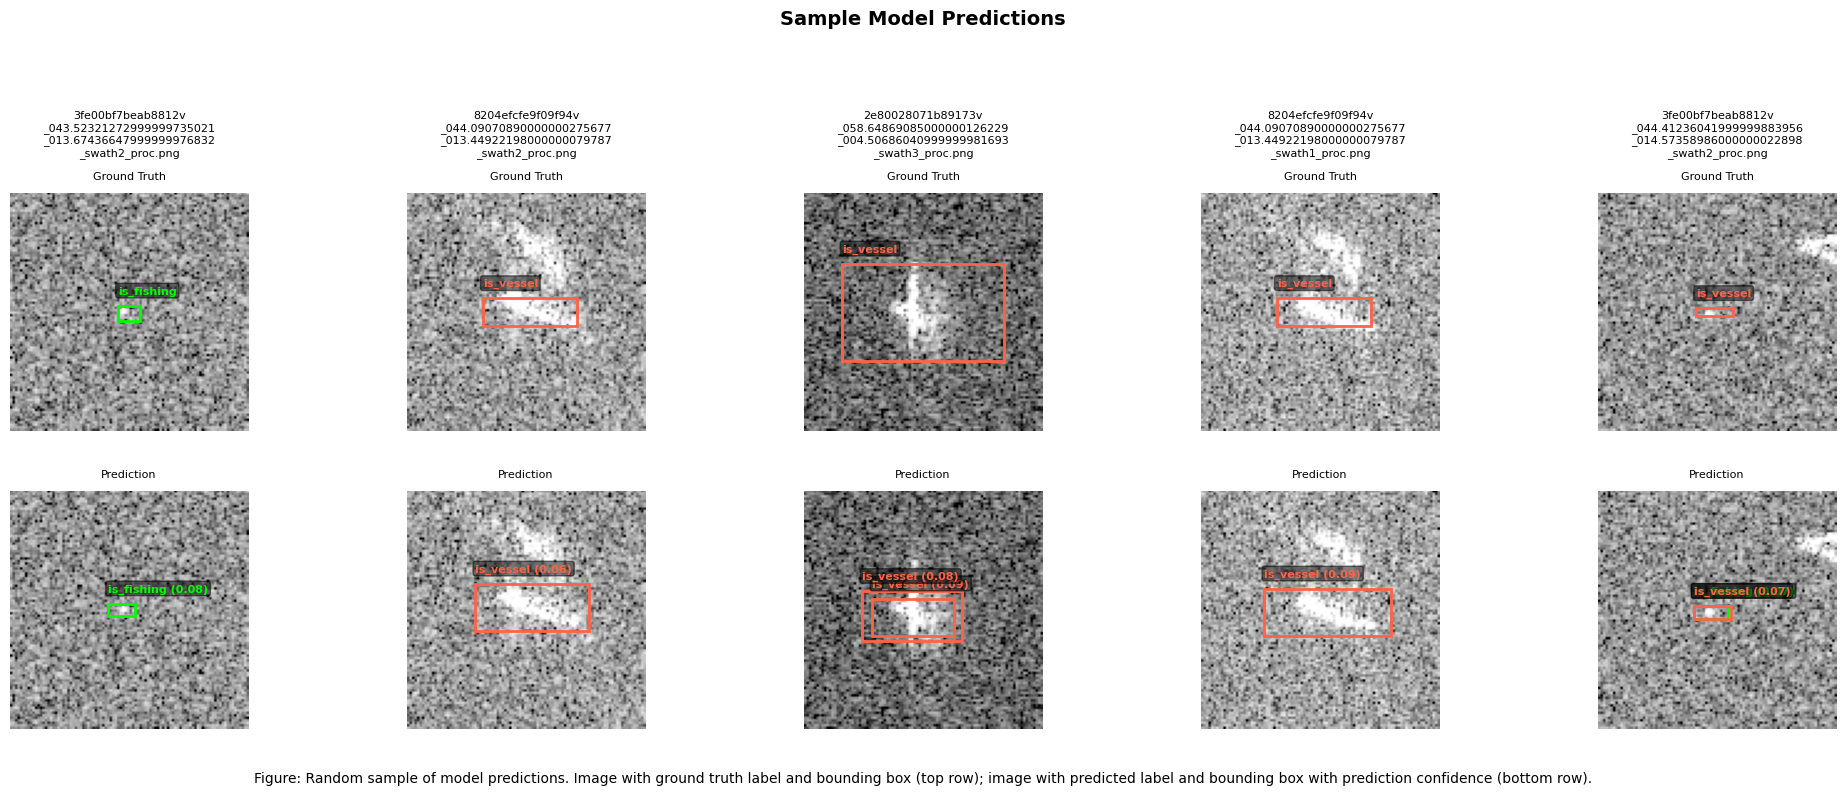

In [41]:
model = YOLO(model_path)

from compare_inference_results import create_sar_prediction_comparison
create_sar_prediction_comparison(model, test_images_dir,
                                 labels_path=test_labels_dir,
                                 conf=0.05,
                                 iou=0.7,
                                 verbose=False,
                                 num_images=5,
                                 save_path=None
)